In [73]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [28]:
df = pd.read_excel('/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/COVID-19/data/data_covid_fix_name.xlsx')
del df["cumul"]

In [29]:
# 欠損の削除
df.dropna(inplace=True)

In [30]:
df.reset_index(inplace=True)
del df["index"]

In [33]:
df.head()

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
0,Albania,2866376,60.319,13364.155397,6.996524e+06,7.84,8.005411,7.67,70,74.3,1,303.14
1,Algeria,42228429,72.629,15481.787620,9.108277e+06,4.99,5.201489,4.77,58,12.0,1,6442.44
2,Angola,30809762,65.514,6452.355165,1.049012e+07,5.40,5.979936,4.83,83,17.9,1,76.94
3,Argentina,44494502,91.870,20610.568550,1.902562e+07,6.86,8.044600,5.67,65,74.9,1,1516.63
4,Australia,24992369,86.012,51663.365095,7.608913e+06,8.62,9.160533,8.07,26,97.3,1,75667.65


# 階層型クラスタリング  

In [110]:
data = df[["pop", "urb", "gdp", "dist", "ef", "pf", "detection", "air"]]
#data["pop"] = np.log(data["pop"])

# 標準化
sc = StandardScaler()
sc.fit(data)
data_std = sc.transform(data)

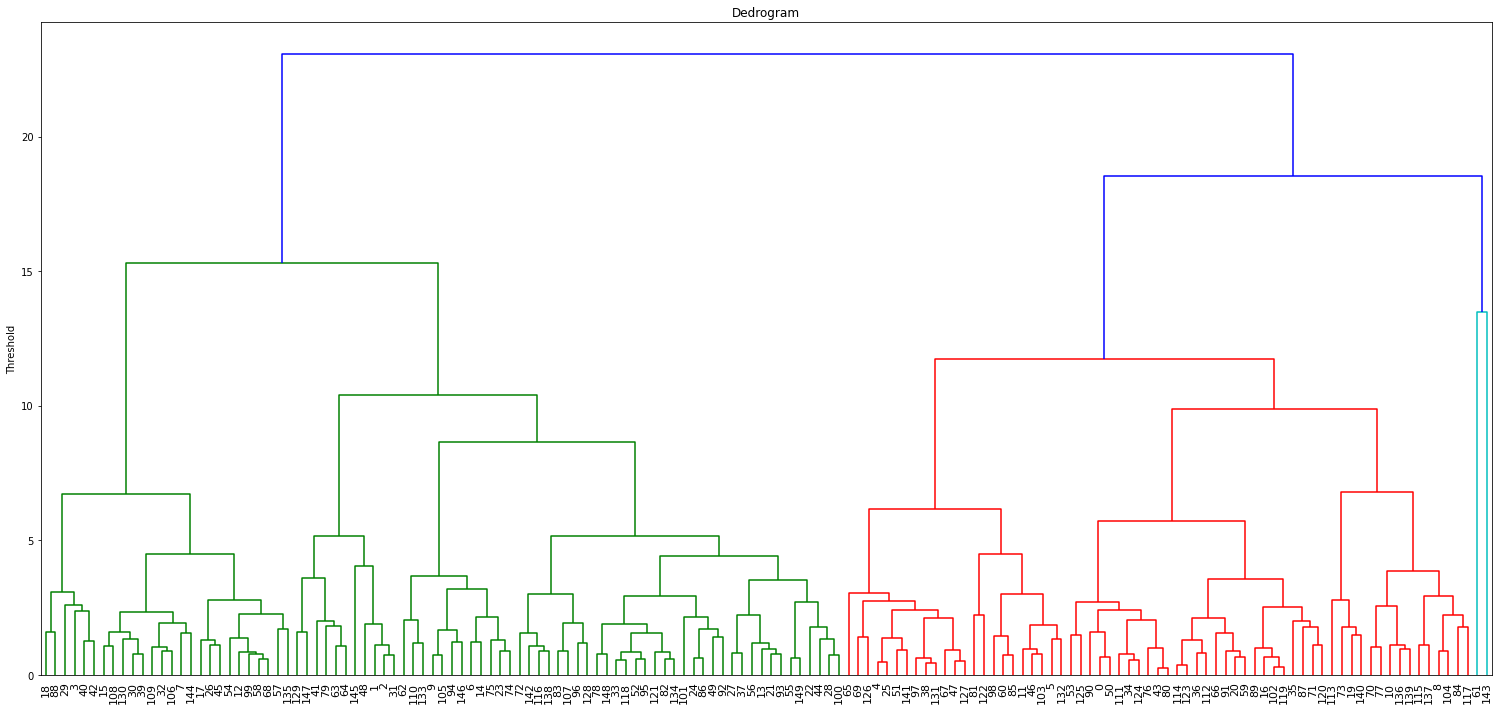

In [111]:
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(data_std, 
                  # 距離の定義
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #metric = 'Euclidean',
                  #method= 'single')
                  
                  # リンケージ手法
                  #method = 'average')
                  #method= 'complete')
                  #method='weighted')
                  #method = 'centroid')
                  #method = 'median')
                  #method = 'single')
                  method = 'ward')

plt.figure(figsize=(26,12))
dendrogram(result1)
plt.title("Dedrogram")
plt.ylabel("Threshold")
plt.xticks(fontsize=11)
plt.show()

In [106]:
df.iloc[61,:]

country             India
pop            1352617328
urb                 34.03
gdp               7762.88
dist          2.77728e+06
hf                   6.64
pf                6.36884
ef                   6.91
date_first             31
detection            47.4
status                  1
air                164036
Name: 61, dtype: object

In [107]:
df.iloc[143,:]

country               USA
pop             327167434
urb                82.256
gdp               62794.6
dist          1.01967e+07
hf                   8.46
pf                8.72005
ef                   8.19
date_first             22
detection            98.2
status                  1
air                889022
Name: 143, dtype: object

# 非階層型クラスタリング  

In [112]:
data = df[["pop", "urb", "gdp", "dist", "ef", "pf", "detection", "air"]]

# 標準化
sc = StandardScaler()
sc.fit(data)
data_std = sc.transform(data)

In [113]:
N_CLUSTERS = 3
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=10)
kmeans.fit(data_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [114]:
result = kmeans.labels_

0    66
1    83
2     1
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

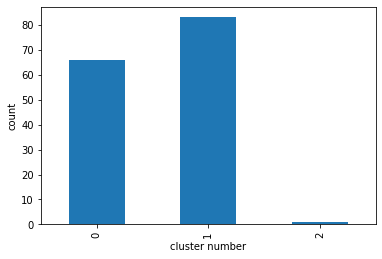

In [115]:
# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(result, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [95]:
df.iloc[result==0,]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
0,Albania,2866376,60.319,13364.155397,6.996524e+06,7.84,8.005411,7.67,70,74.3,1,303.14
3,Argentina,44494502,91.870,20610.568550,1.902562e+07,6.86,8.044600,5.67,65,74.9,1,1516.63
4,Australia,24992369,86.012,51663.365095,7.608913e+06,8.62,9.160533,8.07,26,97.3,1,75667.65
5,Austria,8847037,58.297,55454.689293,7.103537e+06,8.48,9.245685,7.71,58,73.2,1,12935.50
7,Bahamas,385640,83.025,32087.729155,1.327614e+07,7.56,7.871205,7.25,77,21.8,1,1197.12
8,Bahrain,1569439,89.287,47303.048506,5.138295e+06,6.63,5.910895,7.35,56,45.8,1,5877.00
11,Belgium,11422068,98.001,51407.998337,7.548354e+06,8.29,9.067695,7.51,36,62.5,1,13639.49
18,Brazil,209469333,86.569,16096.400962,1.633561e+07,6.48,6.739923,6.23,58,82.4,1,102109.98
19,Brunei,428962,77.629,80920.048684,3.719566e+06,5.69,4.760902,6.62,71,30.5,1,1234.45
20,Bulgaria,7024216,75.008,21960.369942,6.532154e+06,7.79,8.035541,7.54,69,53.3,1,1022.64


In [96]:
df.iloc[result==1,]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
1,Algeria,42228429,72.629,15481.787620,9.108277e+06,4.99,5.201489,4.77,58,12.0,1,6442.44
2,Angola,30809762,65.514,6452.355165,1.049012e+07,5.40,5.979936,4.83,83,17.9,1,76.94
6,Azerbaijan,9942334,55.680,18044.136784,4.849217e+06,6.22,6.104661,6.34,61,45.0,1,2279.55
9,Bangladesh,161356039,36.632,4371.754986,1.918841e+06,5.77,5.365573,6.18,70,50.9,1,5984.16
10,Belarus,9485386,78.595,19994.804079,5.952246e+06,6.65,6.659028,6.64,60,28.9,1,2760.17
12,Belize,383071,45.724,8648.088800,1.391073e+07,6.95,7.118364,6.78,85,30.4,1,1297.53
13,Benin,11485048,47.312,2424.755845,1.038951e+07,6.77,7.469387,6.08,78,24.2,1,0.90
14,Bhutan,754394,40.895,10167.934057,1.621388e+06,6.53,6.286280,6.77,67,42.8,1,275.85
15,Bolivia,11353142,69.425,7873.166243,1.753452e+07,6.61,7.074826,6.14,73,33.1,1,4122.11
16,Bosnia and Herzegovina,3323929,48.245,14623.674053,7.016981e+06,7.37,8.040348,6.69,67,41.7,1,7.07


In [97]:
df.iloc[result==2,]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
61,India,1352617328,34.03,7762.88177,2.777278e+06,6.64,6.368844,6.91,31,47.4,1,164035.64


## エルボー法によるクラスター数の推定¶

Text(0, 0.5, 'Distortion')

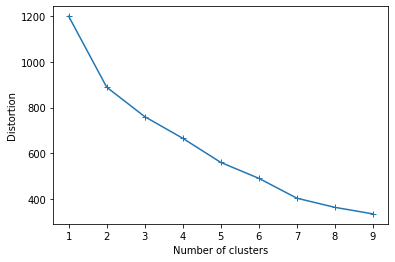

In [98]:
# エルボー方による推定。クラスター数を1から10に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(data_std)
    dist_list.append(kmeans.inertia_)
    
# グラフを表示
plt.plot(range(1,10), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')